In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [175]:
df=pd.read_csv("/content/drive/MyDrive/Rregression/waterPollution.csv", encoding='latin-1')
df.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84


In [176]:
df.shape

(20000, 29)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  object 
 1   observedPropertyDeterminandCode              20000 non-null  object 
 2   procedureAnalysedFraction                    20000 non-null  object 
 3   procedureAnalysedMedia                       20000 non-null  object 
 4   resultUom                                    20000 non-null  object 
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  object 
 7   resultMeanValue                              20000 non-null  float64
 8   waterBodyIdentifier                          20000 non-null  object 
 9   Country                                      19896 non-null  object 
 10

In [178]:
df.describe()

,phenomenonTimeReferenceYear,resultMeanValue,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
count,20000.000000,20000.000000,19893.000000,19893.000000,1.989300e+04,20000.000000,19893.000000,19893.000000,19893.000000,19893.000000,...,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000
mean,2008.998700,34.444639,149.895102,26.227472,4.919348e+07,0.141400,114206.842878,0.130027,14.859312,4.652609,...,32.166075,7.663619,3.196126,23.519892,18.903705,11.206789,0.159449,2.073875,1.302482,23.312787
std,1.917859,174.643233,75.994558,6.790095,2.469506e+07,1.922314,144682.517527,0.260679,31.565912,3.444092,...,11.326430,3.279468,1.130070,6.551350,4.252571,4.901386,0.731725,3.013117,3.656386,5.958540
min,1991.000000,0.000015,14.548292,3.875411,5.300380e+05,0.000000,-83749.750000,0.000000,0.000000,1.064468,...,12.780000,2.200000,1.380000,0.000000,5.000000,1.450000,0.000000,0.000000,0.000000,0.760000
25%,2008.000000,0.114100,122.299437,23.733280,2.586796e+07,0.000000,21256.750000,0.005718,0.000000,4.363288,...,30.000000,5.440000,3.000000,17.700000,18.900000,9.000000,0.000000,0.000000,0.000000,22.260000
50%,2009.000000,2.000000,122.299437,30.831906,5.094169e+07,0.000000,75808.375000,0.005718,0.000000,4.457840,...,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,0.000000,22.260000
75%,2009.000000,10.975625,137.976566,30.831906,7.117635e+07,0.000000,75808.375000,0.032407,0.000000,4.457840,...,32.000000,10.000000,3.000000,26.000000,20.000000,12.400000,0.000000,2.000000,2.700000,27.250000
max,2017.000000,14108.000000,511.475928,38.767234,7.117635e+07,100.000000,582211.000000,0.729194,87.158924,25.982190,...,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,6.000000,17.210000,30.460000,47.830000


In [179]:
df.isna().sum()

,0
parameterWaterBodyCategory,0
observedPropertyDeterminandCode,0
procedureAnalysedFraction,0
procedureAnalysedMedia,0
resultUom,0
phenomenonTimeReferenceYear,0
parameterSamplingPeriod,0
resultMeanValue,0
waterBodyIdentifier,0
Country,104


In [180]:
df.drop(columns=['waterBodyIdentifier'], inplace=True)
df.head()


,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,Country,PopulationDensity,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,France,122.299437,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,France,122.299437,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,France,122.299437,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,France,122.299437,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,Spain,93.677197,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84


In [181]:
df['PopulationDensity'] = df['PopulationDensity'].fillna(0).astype('int32')
df['PopulationDensity'] = df['PopulationDensity'].dropna().astype('int32')




In [182]:
df.tail()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,Country,PopulationDensity,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
19995,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.092466,France,122,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19996,RW,EEA_3131-01-9,total,water,%,2009,2009-01--2009-12,89.908300,France,122,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19997,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,18.901608,France,122,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19998,RW,EEA_3164-08-7,total,water,{massRatio},2009,2009-01--2009-12,307.307000,France,122,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19999,RW,EEA_3152-01-0,total,water,[pH],2009,2009-01--2009-12,7.954790,France,122,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26


In [183]:
df.dtypes

,0
parameterWaterBodyCategory,object
observedPropertyDeterminandCode,object
procedureAnalysedFraction,object
procedureAnalysedMedia,object
resultUom,object
phenomenonTimeReferenceYear,int64
parameterSamplingPeriod,object
resultMeanValue,float64
Country,object
PopulationDensity,int32


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  object 
 1   observedPropertyDeterminandCode              20000 non-null  object 
 2   procedureAnalysedFraction                    20000 non-null  object 
 3   procedureAnalysedMedia                       20000 non-null  object 
 4   resultUom                                    20000 non-null  object 
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  object 
 7   resultMeanValue                              20000 non-null  float64
 8   Country                                      19896 non-null  object 
 9   PopulationDensity                            20000 non-null  int32  
 10

EDA

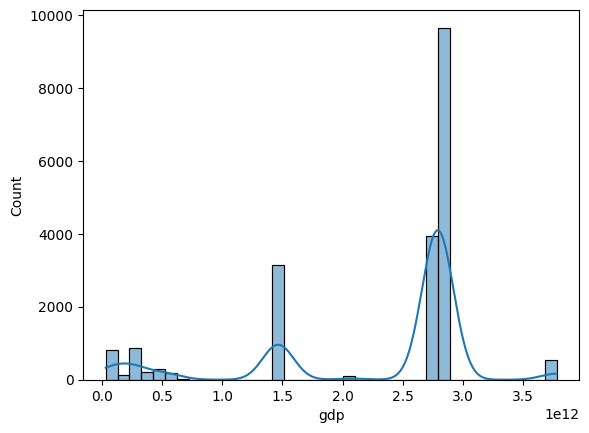

In [185]:
sns.histplot(df['gdp'], kde=True)
plt.show()

<Axes: xlabel='gdp', ylabel='Count'>

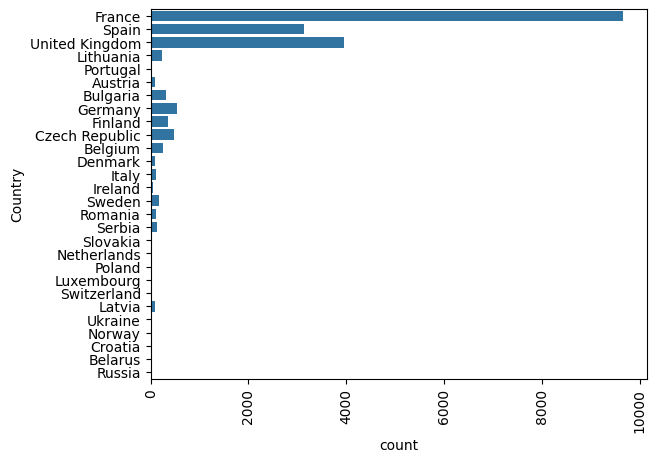

In [186]:
sns.countplot(y=df['Country'])
plt.xticks(rotation=90)
plt.show()

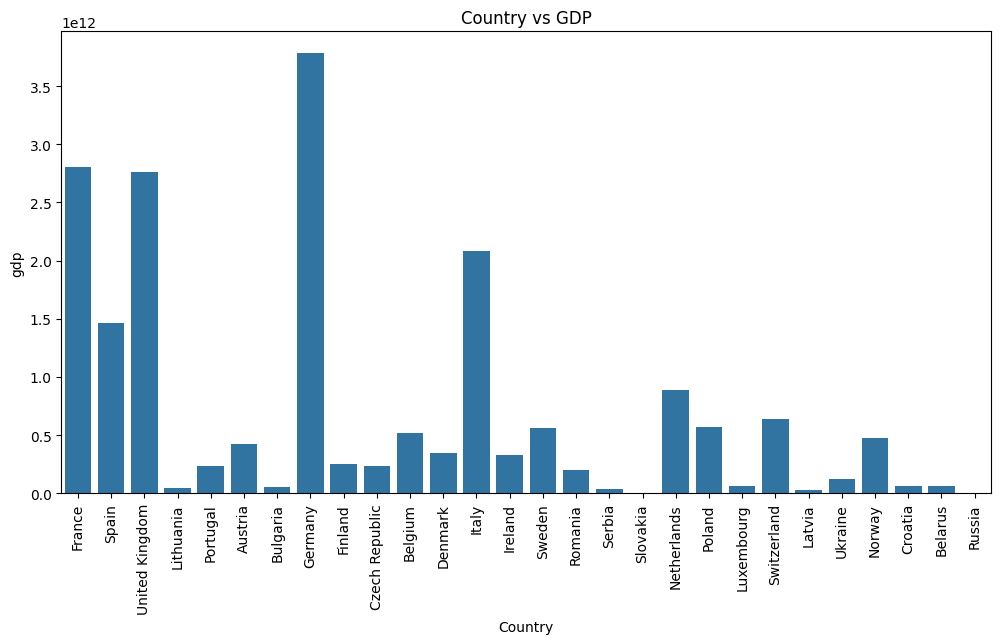

In [187]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Country'], y=df['gdp'])
plt.title("Country vs GDP")
plt.xticks(rotation=90)
plt.show()

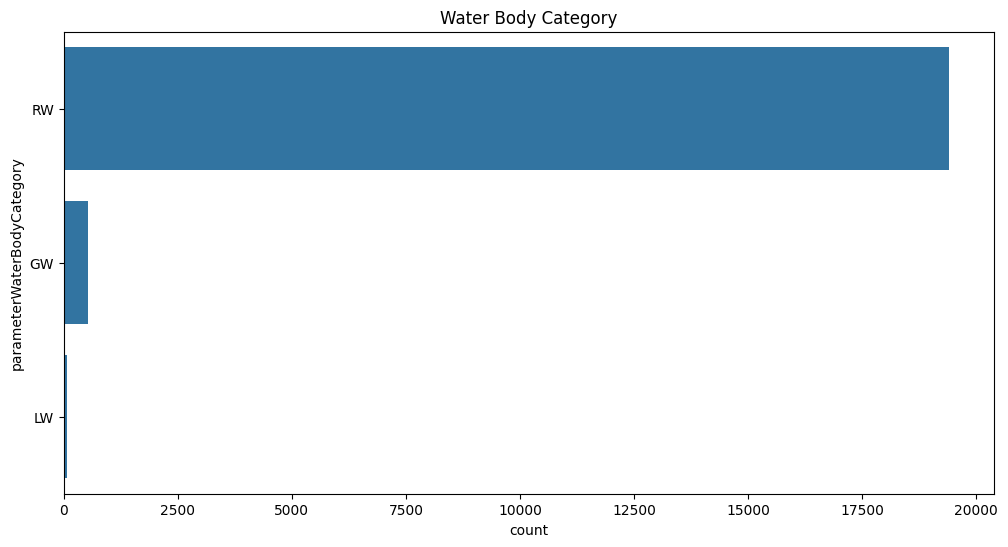

In [188]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['parameterWaterBodyCategory'])
plt.title("Water Body Category")
plt.show()

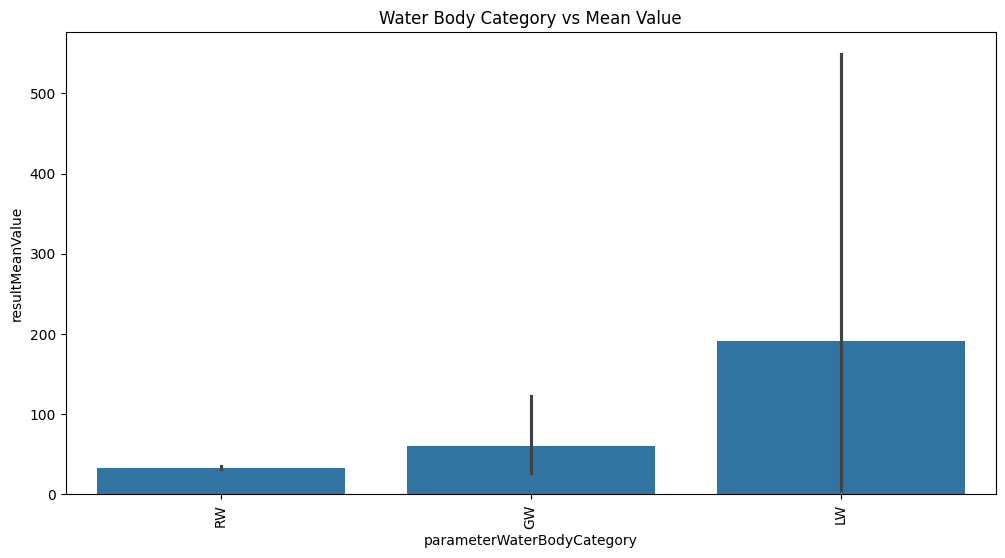

In [189]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['parameterWaterBodyCategory'], y=df['resultMeanValue'])
plt.title("Water Body Category vs Mean Value")
plt.xticks(rotation=90)
plt.show()

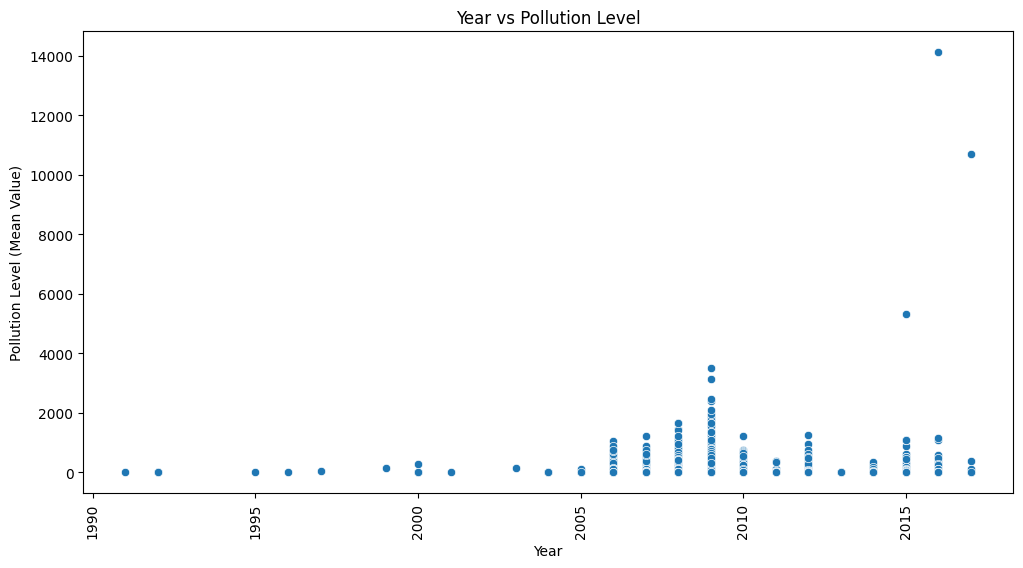

In [190]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['phenomenonTimeReferenceYear'], y=df['resultMeanValue'])
plt.title("Year vs Pollution Level")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Pollution Level (Mean Value)")
plt.show()

In [191]:
df['Is_Water_Sample'] = df['procedureAnalysedMedia'].apply(lambda x: 1 if 'water' in str(x).lower() else 0)
df['Contains_Nitrate'] = df['observedPropertyDeterminandCode'].apply(lambda x: 1 if 'NO3' in str(x) else 0)


In [192]:
df.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,Country,PopulationDensity,...,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,Is_Water_Sample,Contains_Nitrate
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,France,122,...,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1,0
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,France,122,...,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1,0
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,France,122,...,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1,0
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,France,122,...,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1,0
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,Spain,93,...,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,1,0


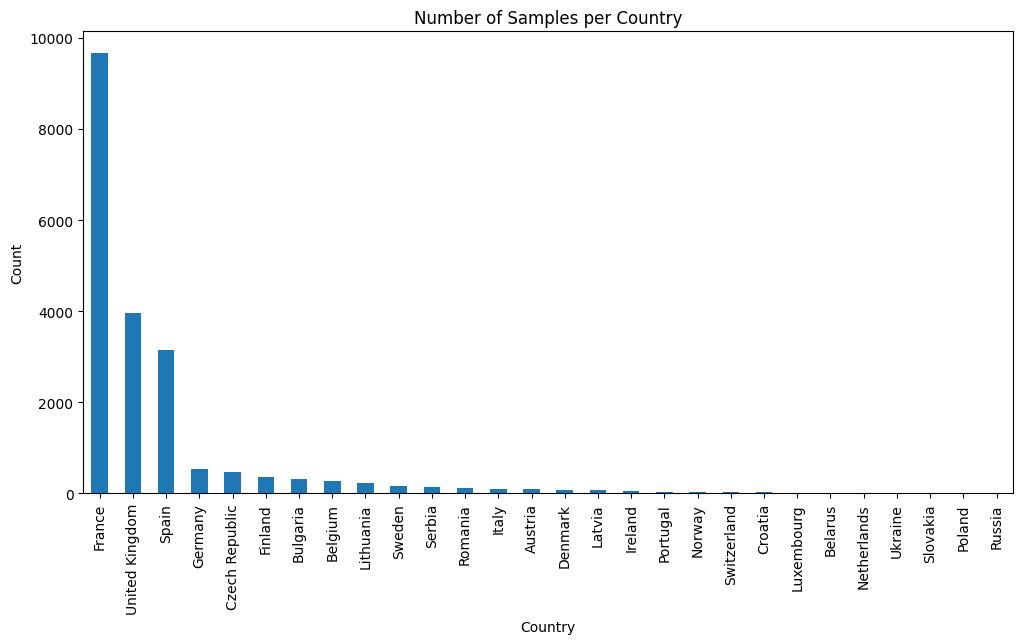

In [193]:
df['Country'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title("Number of Samples per Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


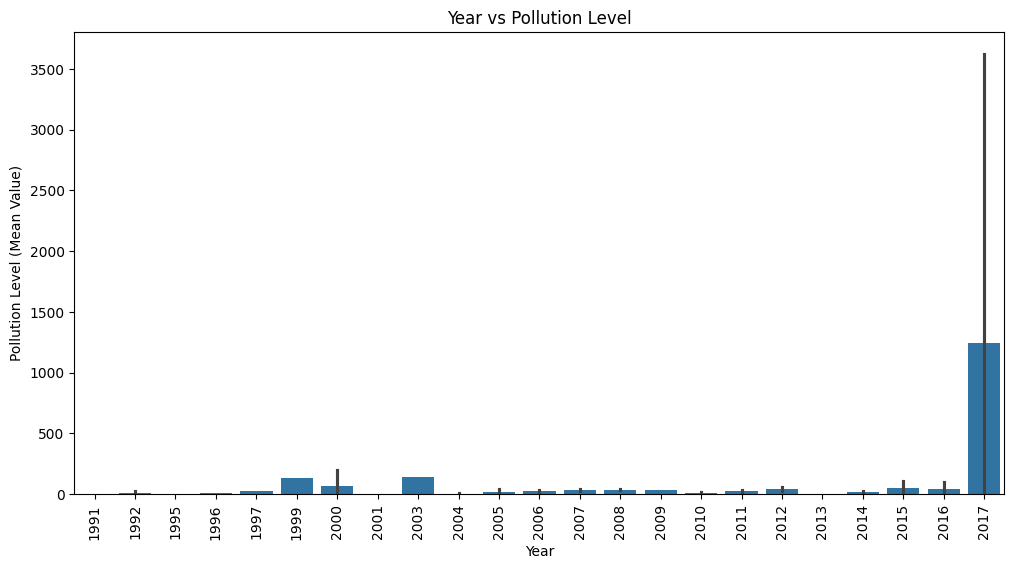

In [194]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['phenomenonTimeReferenceYear'], y=df['resultMeanValue'])
plt.title("Year vs Pollution Level")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Pollution Level (Mean Value)")
plt.show()

In [195]:
def extract_years(period_string):
    parts = period_string.split("--")
    start_year = int(parts[0].split("-")[0])
    end_year = int(parts[1].split("-")[0])
    return start_year, end_year

df[['Start_Year', 'End_Year']] = pd.DataFrame(df['parameterSamplingPeriod'].apply(extract_years).tolist(), index=df.index)

print(df[['parameterSamplingPeriod', 'Start_Year', 'End_Year']].head())


  parameterSamplingPeriod  Start_Year  End_Year
0        2009-01--2009-12        2009      2009
1        2009-01--2009-12        2009      2009
2        2009-01--2009-12        2009      2009
3        2009-01--2009-12        2009      2009
4        2009-01--2009-12        2009      2009


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  object 
 1   observedPropertyDeterminandCode              20000 non-null  object 
 2   procedureAnalysedFraction                    20000 non-null  object 
 3   procedureAnalysedMedia                       20000 non-null  object 
 4   resultUom                                    20000 non-null  object 
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  object 
 7   resultMeanValue                              20000 non-null  float64
 8   Country                                      19896 non-null  object 
 9   PopulationDensity                            20000 non-null  int32  
 10

In [197]:
num_columns = df.select_dtypes(exclude='object').columns
print(num_columns)


Index(['phenomenonTimeReferenceYear', 'resultMeanValue', 'PopulationDensity',
       'TerraMarineProtected_2016_2018', 'TouristMean_1990_2020', 'VenueCount',
       'netMigration_2011_2018', 'droughts_floods_temperature',
       'literacyRate_2010_2018', 'combustibleRenewables_2009_2014', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'waste_treatment_recycling_percent', 'Is_Water_Sample',
       'Contains_Nitrate', 'Start_Year', 'End_Year'],
      dtype='object')


In [198]:
num_columns = df.select_dtypes(exclude='object').columns
correlation = df[num_columns].corr()['resultMeanValue']
print(correlation)


phenomenonTimeReferenceYear                    0.013004
resultMeanValue                                1.000000
PopulationDensity                             -0.016112
TerraMarineProtected_2016_2018                 0.033836
TouristMean_1990_2020                          0.042552
VenueCount                                    -0.004898
netMigration_2011_2018                        -0.015895
droughts_floods_temperature                   -0.022134
literacyRate_2010_2018                        -0.018817
combustibleRenewables_2009_2014               -0.008604
gdp                                            0.022693
composition_food_organic_waste_percent        -0.004931
composition_glass_percent                      0.035389
composition_metal_percent                     -0.031498
composition_other_percent                      0.027542
composition_paper_cardboard_percent            0.003330
composition_plastic_percent                   -0.012777
composition_rubber_leather_percent            -0

In [199]:
df['pollution_density'] = (df['resultMeanValue'] / (df['End_Year'] - df['Start_Year'] + 1)).astype('float')

print(df[['resultMeanValue', 'Start_Year', 'End_Year', 'pollution_density']].head())


   resultMeanValue  Start_Year  End_Year  pollution_density
0         0.063310        2009      2009           0.063310
1         0.046733        2009      2009           0.046733
2       132.859000        2009      2009         132.859000
3        11.578376        2009      2009          11.578376
4         0.206800        2009      2009           0.206800


In [200]:
num_columns = df.select_dtypes(include=['number'])

correlation_with_result = num_columns.corr()['resultMeanValue']

print(correlation_with_result)


phenomenonTimeReferenceYear                    0.013004
resultMeanValue                                1.000000
PopulationDensity                             -0.016112
TerraMarineProtected_2016_2018                 0.033836
TouristMean_1990_2020                          0.042552
VenueCount                                    -0.004898
netMigration_2011_2018                        -0.015895
droughts_floods_temperature                   -0.022134
literacyRate_2010_2018                        -0.018817
combustibleRenewables_2009_2014               -0.008604
gdp                                            0.022693
composition_food_organic_waste_percent        -0.004931
composition_glass_percent                      0.035389
composition_metal_percent                     -0.031498
composition_other_percent                      0.027542
composition_paper_cardboard_percent            0.003330
composition_plastic_percent                   -0.012777
composition_rubber_leather_percent            -0

In [201]:
df.drop(columns=['parameterSamplingPeriod'], inplace=True)


In [202]:
df.drop(columns=['composition_glass_percent', 'composition_metal_percent', 'composition_plastic_percent'], inplace=True)


In [203]:
df['Water Body Info'] = df['PopulationDensity'].astype(str).apply(lambda x: " ".join(x.split()[0:3]))
print(df[['Water Body Info']].head())


  Water Body Info
0             122
1             122
2             122
3             122
4              93


In [204]:
df.head()


,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,resultMeanValue,Country,PopulationDensity,TerraMarineProtected_2016_2018,...,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,Is_Water_Sample,Contains_Nitrate,Start_Year,End_Year,pollution_density,Water Body Info
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,0.063310,France,122,30.831906,...,0.0,0.0,0.0,22.26,1,0,2009,2009,0.063310,122
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,0.046733,France,122,30.831906,...,0.0,0.0,0.0,22.26,1,0,2009,2009,0.046733,122
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,132.859000,France,122,30.831906,...,0.0,0.0,0.0,22.26,1,0,2009,2009,132.859000,122
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,11.578376,France,122,30.831906,...,0.0,0.0,0.0,22.26,1,0,2009,2009,11.578376,122
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,0.206800,Spain,93,15.047884,...,0.0,2.0,0.0,16.84,1,0,2009,2009,0.206800,93


In [205]:
df.columns = df.columns.str.strip()
country_counts = df['Country'].value_counts()
print(country_counts)

Country
France            9661
United Kingdom    3957
Spain             3141
Germany            541
Czech Republic     479
Finland            355
Bulgaria           322
Belgium            261
Lithuania          228
Sweden             171
Serbia             129
Romania            117
Italy              101
Austria             91
Denmark             82
Latvia              82
Ireland             44
Portugal            35
Norway              27
Switzerland         22
Croatia             19
Luxembourg          15
Belarus              5
Netherlands          4
Ukraine              3
Slovakia             2
Poland               1
Russia               1
Name: count, dtype: int64


In [206]:
def categorize_water_pollution(row):
    country = row['Country']
    pollution = row['resultMeanValue']

    if pd.isna(pollution):
        return 'Unknown Pollution Level'

    if country == 'France':
        return 'High Pollution' if pollution > 10 else 'Moderate Pollution'
    elif country == 'Spain':
        return 'High Pollution' if pollution > 8 else 'Low Pollution'
    elif country == 'Germany':
        return 'Very High Pollution' if pollution > 12 else 'Moderate Pollution'
    elif country == 'Italy':
        return 'Moderate Pollution' if pollution > 5 else 'Low Pollution'
    else:
        return 'Other Region Pollution'

df['Pollution Category'] = df.apply(categorize_water_pollution, axis=1)


print(df[['Country', 'resultMeanValue', 'Pollution Category']].head())

  Country  resultMeanValue  Pollution Category
0  France         0.063310  Moderate Pollution
1  France         0.046733  Moderate Pollution
2  France       132.859000      High Pollution
3  France        11.578376      High Pollution
4   Spain         0.206800       Low Pollution


In [217]:
def categorize_pollutant(code):
    if code.startswith("CAS_14797-65") or code.startswith("CAS_14797-55"):
        return "Nitrate Compounds"
    elif code.startswith("EEA_3164") or code.startswith("EEA_3151"):
        return "Organic Pollutants"
    elif code.startswith("CAS_14797"):
        return "Nitrite Compounds"
    else:
        return "Other Pollutants"


df["Pollutant_Category"] = df["observedPropertyDeterminandCode"].apply(categorize_pollutant)


df[["observedPropertyDeterminandCode", "Pollutant_Category"]].head()


,observedPropertyDeterminandCode,Pollutant_Category
0,CAS_14797-65-0,Nitrate Compounds
1,CAS_14797-65-0,Nitrate Compounds
2,EEA_3164-07-6,Organic Pollutants
3,CAS_14797-55-8,Nitrate Compounds
4,EEA_3151-01-7,Organic Pollutants


In [219]:
df['Pollutant Category'] = df['observedPropertyDeterminandCode'].apply(categorize_pollutant)


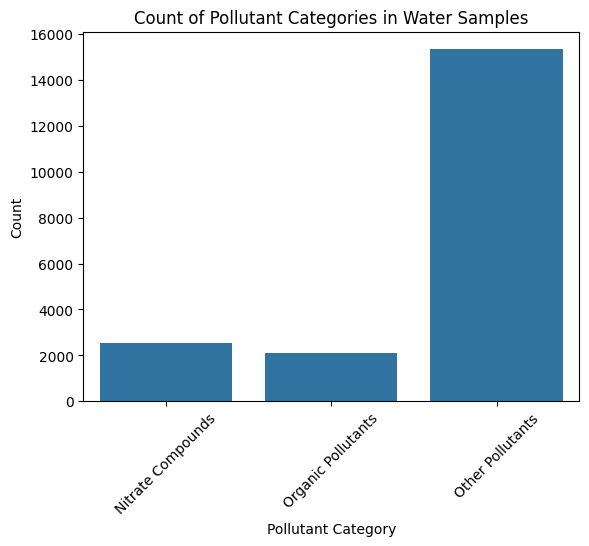

In [221]:
sns.countplot(x=df['Pollutant Category'])
plt.xticks(rotation=45)
plt.xlabel("Pollutant Category")
plt.ylabel("Count")
plt.title("Count of Pollutant Categories in Water Samples")
plt.show()


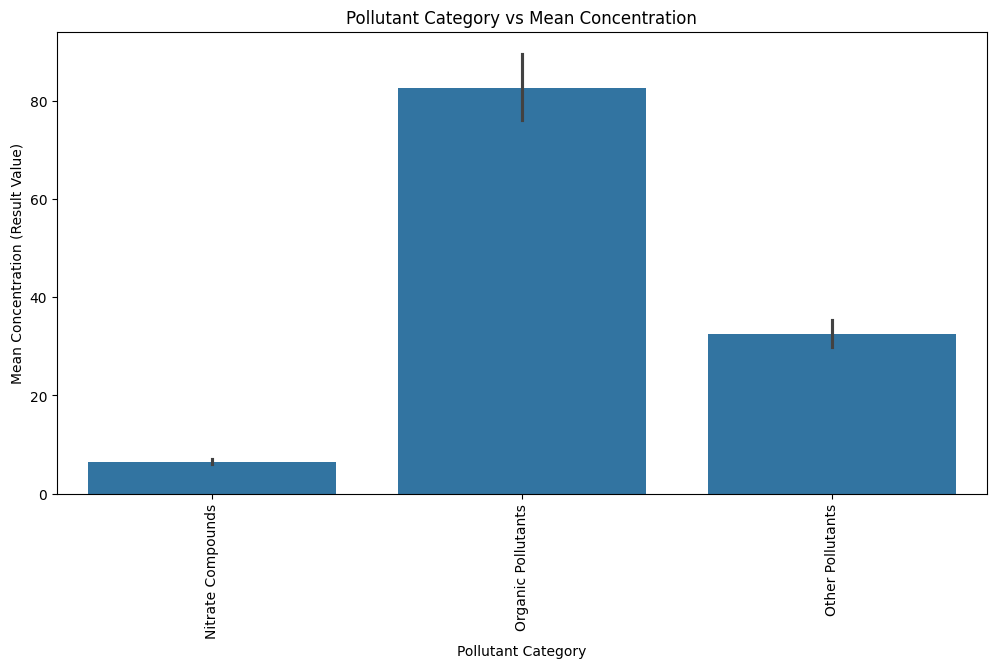

In [229]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Pollutant Category'], y=df['resultMeanValue'])
plt.title("Pollutant Category vs Mean Concentration")
plt.xlabel("Pollutant Category")
plt.ylabel("Mean Concentration (Result Value)")
plt.xticks(rotation=90)
plt.show()


In [222]:
df.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,resultMeanValue,Country,PopulationDensity,TerraMarineProtected_2016_2018,...,waste_treatment_recycling_percent,Is_Water_Sample,Contains_Nitrate,Start_Year,End_Year,pollution_density,Water Body Info,Pollution Category,Pollutant_Category,Pollutant Category
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,0.063310,France,122,30.831906,...,22.26,1,0,2009,2009,0.063310,122,Moderate Pollution,Nitrate Compounds,Nitrate Compounds
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,0.046733,France,122,30.831906,...,22.26,1,0,2009,2009,0.046733,122,Moderate Pollution,Nitrate Compounds,Nitrate Compounds
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,132.859000,France,122,30.831906,...,22.26,1,0,2009,2009,132.859000,122,High Pollution,Organic Pollutants,Organic Pollutants
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,11.578376,France,122,30.831906,...,22.26,1,0,2009,2009,11.578376,122,High Pollution,Nitrate Compounds,Nitrate Compounds
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,0.206800,Spain,93,15.047884,...,16.84,1,0,2009,2009,0.206800,93,Low Pollution,Organic Pollutants,Organic Pollutants


In [223]:
df.drop(columns=['parameterWaterBodyCategory', 'observedPropertyDeterminandCode'], inplace=True)


In [224]:
(df.columns.tolist())

['procedureAnalysedFraction',
 'procedureAnalysedMedia',
 'resultUom',
 'phenomenonTimeReferenceYear',
 'resultMeanValue',
 'Country',
 'PopulationDensity',
 'TerraMarineProtected_2016_2018',
 'TouristMean_1990_2020',
 'VenueCount',
 'netMigration_2011_2018',
 'droughts_floods_temperature',
 'literacyRate_2010_2018',
 'combustibleRenewables_2009_2014',
 'gdp',
 'composition_food_organic_waste_percent',
 'composition_other_percent',
 'composition_paper_cardboard_percent',
 'composition_rubber_leather_percent',
 'composition_wood_percent',
 'composition_yard_garden_green_waste_percent',
 'waste_treatment_recycling_percent',
 'Is_Water_Sample',
 'Contains_Nitrate',
 'Start_Year',
 'End_Year',
 'pollution_density',
 'Water Body Info',
 'Pollution Category',
 'Pollutant_Category',
 'Pollutant Category']

In [225]:
df['composition_food_organic_waste_percent'] = (
    df['composition_food_organic_waste_percent']
    .astype(str)
    .replace(r'\.0', '', regex=True)
    .str.replace('%', '')
)
new = df['composition_food_organic_waste_percent'].str.split("+", expand=True).fillna("0")
df.drop(columns=['composition_food_organic_waste_percent'], inplace=True)


In [226]:
df.head()

,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,resultMeanValue,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,...,waste_treatment_recycling_percent,Is_Water_Sample,Contains_Nitrate,Start_Year,End_Year,pollution_density,Water Body Info,Pollution Category,Pollutant_Category,Pollutant Category
0,total,water,mg{NO2}/L,2009,0.063310,France,122,30.831906,71176346.0,0.0,...,22.26,1,0,2009,2009,0.063310,122,Moderate Pollution,Nitrate Compounds,Nitrate Compounds
1,total,water,mg{NO2}/L,2009,0.046733,France,122,30.831906,71176346.0,0.0,...,22.26,1,0,2009,2009,0.046733,122,Moderate Pollution,Nitrate Compounds,Nitrate Compounds
2,total,water,{massRatio},2009,132.859000,France,122,30.831906,71176346.0,0.0,...,22.26,1,0,2009,2009,132.859000,122,High Pollution,Organic Pollutants,Organic Pollutants
3,total,water,mg{NO3}/L,2009,11.578376,France,122,30.831906,71176346.0,2.0,...,22.26,1,0,2009,2009,11.578376,122,High Pollution,Nitrate Compounds,Nitrate Compounds
4,total,water,mmol/L,2009,0.206800,Spain,93,15.047884,50941692.0,4.0,...,16.84,1,0,2009,2009,0.206800,93,Low Pollution,Organic Pollutants,Organic Pollutants


In [227]:
num_columnms=df.select_dtypes(exclude='object').columns
num_columnms

Index(['phenomenonTimeReferenceYear', 'resultMeanValue', 'PopulationDensity',
       'TerraMarineProtected_2016_2018', 'TouristMean_1990_2020', 'VenueCount',
       'netMigration_2011_2018', 'droughts_floods_temperature',
       'literacyRate_2010_2018', 'combustibleRenewables_2009_2014', 'gdp',
       'composition_other_percent', 'composition_paper_cardboard_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'waste_treatment_recycling_percent', 'Is_Water_Sample',
       'Contains_Nitrate', 'Start_Year', 'End_Year', 'pollution_density'],
      dtype='object')

In [230]:
num_columns = df.select_dtypes(include=['number']).columns
df[num_columns].corr()['resultMeanValue']


,resultMeanValue
phenomenonTimeReferenceYear,0.013004
resultMeanValue,1.000000
PopulationDensity,-0.016112
TerraMarineProtected_2016_2018,0.033836
TouristMean_1990_2020,0.042552
VenueCount,-0.004898
netMigration_2011_2018,-0.015895
droughts_floods_temperature,-0.022134
literacyRate_2010_2018,-0.018817
combustibleRenewables_2009_2014,-0.008604


In [231]:
df.drop(columns=['composition_rubber_leather_percent', 'composition_wood_percent'], inplace=True)


In [248]:
df['country'] = df['gdp'].astype(str).apply(lambda x: x.split()[0] if isinstance(x, str) and x.strip() else x)


df.head()

,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,resultMeanValue,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,...,Contains_Nitrate,Start_Year,End_Year,pollution_density,Water Body Info,Pollution Category,Pollutant_Category,Pollutant Category,PropertyCodePrefix,country
0,total,water,mg{NO2}/L,2009,0.063310,France,122,30.831906,71176346.0,0.0,...,0,2009,2009,0.063310,122,Moderate Pollution,Nitrate Compounds,Nitrate Compounds,2806036371233.86,2806036371233.86
1,total,water,mg{NO2}/L,2009,0.046733,France,122,30.831906,71176346.0,0.0,...,0,2009,2009,0.046733,122,Moderate Pollution,Nitrate Compounds,Nitrate Compounds,2806036371233.86,2806036371233.86
2,total,water,{massRatio},2009,132.859000,France,122,30.831906,71176346.0,0.0,...,0,2009,2009,132.859000,122,High Pollution,Organic Pollutants,Organic Pollutants,2806036371233.86,2806036371233.86
3,total,water,mg{NO3}/L,2009,11.578376,France,122,30.831906,71176346.0,2.0,...,0,2009,2009,11.578376,122,High Pollution,Nitrate Compounds,Nitrate Compounds,2806036371233.86,2806036371233.86
4,total,water,mmol/L,2009,0.206800,Spain,93,15.047884,50941692.0,4.0,...,0,2009,2009,0.206800,93,Low Pollution,Organic Pollutants,Organic Pollutants,1464508831011.81,1464508831011.81


In [250]:
df['country'].value_counts()


,count
country,
2806036371233.86,9661
2757620259273.38,3957
1464508831011.81,3141
3781698549834.74,541
231340463131.439,479
252692239709.946,355
56792405577.3656,322
515102640677.261,261
45735444769.2075,228


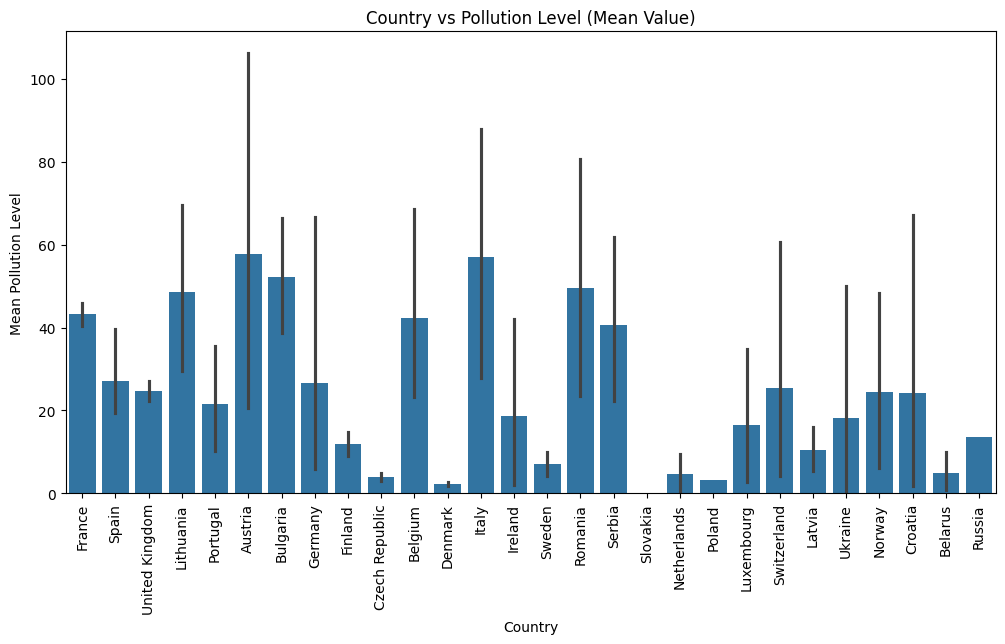

In [252]:
plt.figure(figsize=(12,6))


sns.barplot(x=df['Country'], y=df['resultMeanValue'])

plt.title("Country vs Pollution Level (Mean Value)")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Mean Pollution Level")
plt.show()

In [253]:
df.drop(columns=['procedureAnalysedFraction', 'procedureAnalysedMedia'], inplace=True)


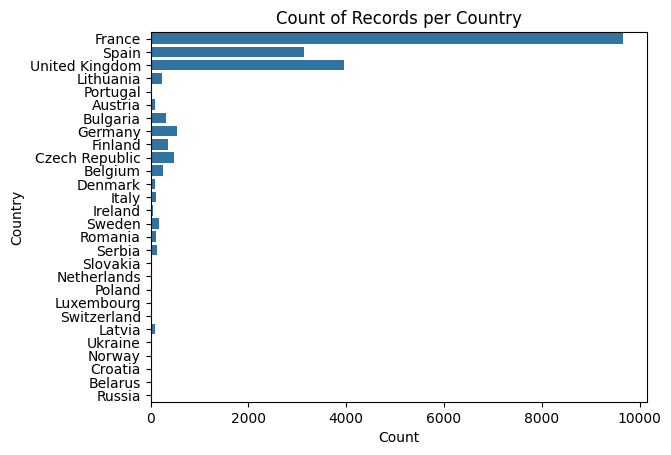

In [255]:
sns.countplot(y=df['Country'])

plt.title("Count of Records per Country")
plt.xlabel("Count")
plt.ylabel("Country")

plt.show()

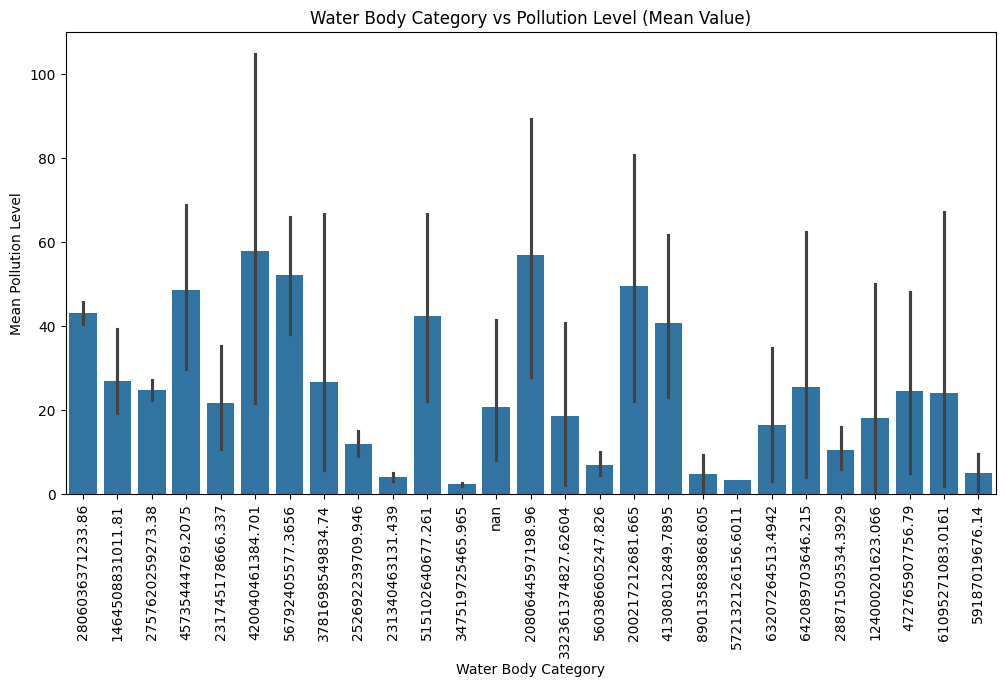

In [259]:
plt.figure(figsize=(12,6))


sns.barplot(x=df['country'], y=df['resultMeanValue'])


plt.title("Water Body Category vs Pollution Level (Mean Value)")
plt.xticks(rotation=90)
plt.xlabel("Water Body Category")
plt.ylabel("Mean Pollution Level")


plt.show()

In [267]:
def categorize_media(media):
    if media in ['water', 'groundwater', 'surface water']:
        return 'Water'
    elif media in ['sediment', 'soil']:
        return 'Land'
    elif media in ['air']:
        return 'Air'
    else:
        return 'Other'

df['media_category'] = df['country'].apply(categorize_media)


In [268]:
df['Country'].value_counts()


,count
Country,
France,9661
United Kingdom,3957
Spain,3141
Germany,541
Czech Republic,479
Finland,355
Bulgaria,322
Belgium,261
Lithuania,228


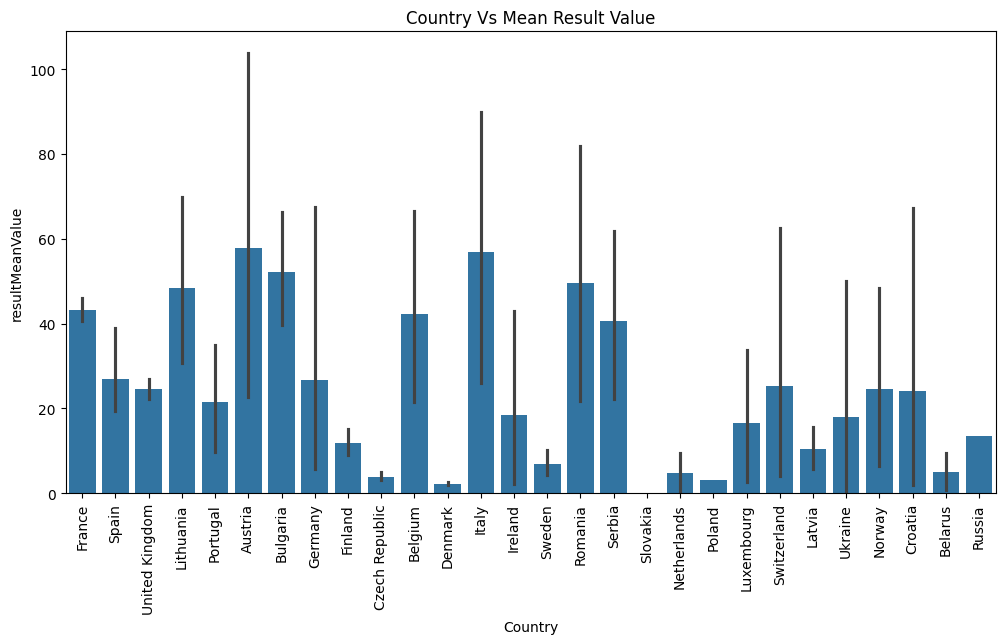

In [270]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Country'], y=df['resultMeanValue'])
plt.title("Country Vs Mean Result Value")
plt.xticks(rotation=90)
plt.show()

In [271]:
col_to_drop = [col for col in df.columns if "observedPropertyDeterminandCode" in col]
df.drop(columns=col_to_drop, inplace=True)


In [272]:
num_columns = df.select_dtypes(exclude='object').columns
print(num_columns)


Index(['phenomenonTimeReferenceYear', 'resultMeanValue', 'PopulationDensity',
       'TerraMarineProtected_2016_2018', 'TouristMean_1990_2020', 'VenueCount',
       'netMigration_2011_2018', 'droughts_floods_temperature',
       'literacyRate_2010_2018', 'combustibleRenewables_2009_2014', 'gdp',
       'composition_other_percent', 'composition_paper_cardboard_percent',
       'composition_yard_garden_green_waste_percent',
       'waste_treatment_recycling_percent', 'Is_Water_Sample',
       'Contains_Nitrate', 'Start_Year', 'End_Year', 'pollution_density'],
      dtype='object')


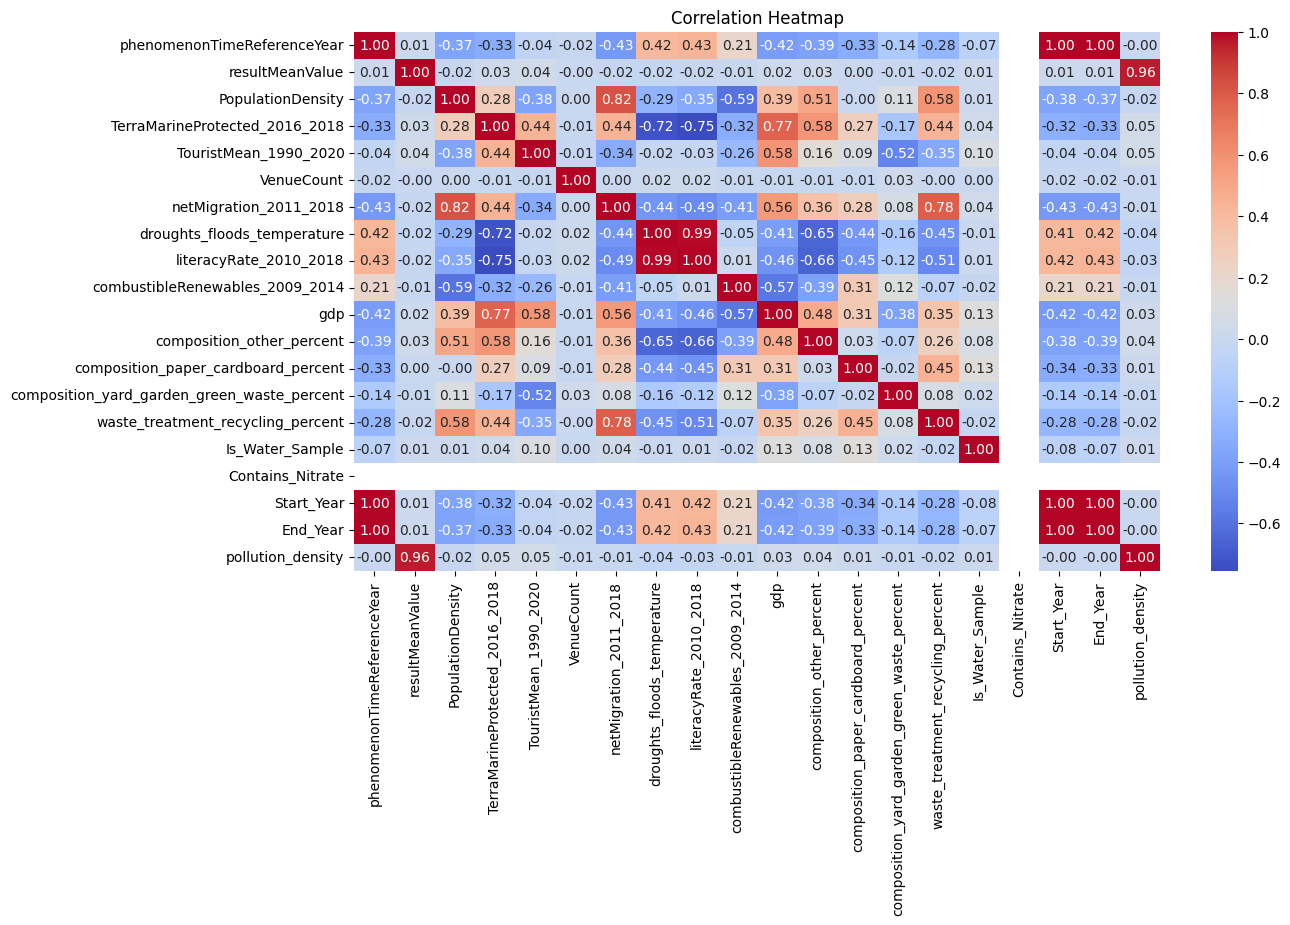

In [273]:
num_columns = df.select_dtypes(exclude='object').columns


plt.figure(figsize=(13, 7))
sns.heatmap(df[num_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [274]:
df.columns

Index(['resultUom', 'phenomenonTimeReferenceYear', 'resultMeanValue',
       'Country', 'PopulationDensity', 'TerraMarineProtected_2016_2018',
       'TouristMean_1990_2020', 'VenueCount', 'netMigration_2011_2018',
       'droughts_floods_temperature', 'literacyRate_2010_2018',
       'combustibleRenewables_2009_2014', 'gdp', 'composition_other_percent',
       'composition_paper_cardboard_percent',
       'composition_yard_garden_green_waste_percent',
       'waste_treatment_recycling_percent', 'Is_Water_Sample',
       'Contains_Nitrate', 'Start_Year', 'End_Year', 'pollution_density',
       'Water Body Info', 'Pollution Category', 'Pollutant_Category',
       'Pollutant Category', 'PropertyCodePrefix', 'country',
       'media_category'],
      dtype='object')

In [275]:
df.head()

,resultUom,phenomenonTimeReferenceYear,resultMeanValue,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,...,Start_Year,End_Year,pollution_density,Water Body Info,Pollution Category,Pollutant_Category,Pollutant Category,PropertyCodePrefix,country,media_category
0,mg{NO2}/L,2009,0.063310,France,122,30.831906,71176346.0,0.0,75808.375,0.005718,...,2009,2009,0.063310,122,Moderate Pollution,Nitrate Compounds,Nitrate Compounds,2806036371233.86,2806036371233.86,Other
1,mg{NO2}/L,2009,0.046733,France,122,30.831906,71176346.0,0.0,75808.375,0.005718,...,2009,2009,0.046733,122,Moderate Pollution,Nitrate Compounds,Nitrate Compounds,2806036371233.86,2806036371233.86,Other
2,{massRatio},2009,132.859000,France,122,30.831906,71176346.0,0.0,75808.375,0.005718,...,2009,2009,132.859000,122,High Pollution,Organic Pollutants,Organic Pollutants,2806036371233.86,2806036371233.86,Other
3,mg{NO3}/L,2009,11.578376,France,122,30.831906,71176346.0,2.0,75808.375,0.005718,...,2009,2009,11.578376,122,High Pollution,Nitrate Compounds,Nitrate Compounds,2806036371233.86,2806036371233.86,Other
4,mmol/L,2009,0.206800,Spain,93,15.047884,50941692.0,4.0,-40055.250,0.729194,...,2009,2009,0.206800,93,Low Pollution,Organic Pollutants,Organic Pollutants,1464508831011.81,1464508831011.81,Other


In [278]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['resultUom', 'phenomenonTimeReferenceYear', 'resultMeanValue',
       'Country', 'PopulationDensity', 'TerraMarineProtected_2016_2018',
       'TouristMean_1990_2020', 'VenueCount', 'netMigration_2011_2018',
       'droughts_floods_temperature', 'literacyRate_2010_2018',
       'combustibleRenewables_2009_2014', 'gdp', 'composition_other_percent',
       'composition_paper_cardboard_percent',
       'composition_yard_garden_green_waste_percent',
       'waste_treatment_recycling_percent', 'Is_Water_Sample',
       'Contains_Nitrate', 'Start_Year', 'End_Year', 'pollution_density',
       'Water Body Info', 'Pollution Category', 'Pollutant_Category',
       'Pollutant Category', 'PropertyCodePrefix', 'country',
       'media_category'],
      dtype='object')


In [282]:
df.drop(columns=['Water Body Info'], inplace=True)


In [283]:
cat_columns = df.select_dtypes(include='object').columns
print(cat_columns)
label_encoders = {}
for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Index(['resultUom', 'Country', 'Pollution Category', 'Pollutant_Category',
       'Pollutant Category', 'PropertyCodePrefix', 'country',
       'media_category'],
      dtype='object')


In [284]:
X = df.drop(columns=['resultMeanValue'])
y = np.log(df['resultMeanValue'])

In [285]:
X

,resultUom,phenomenonTimeReferenceYear,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,...,Contains_Nitrate,Start_Year,End_Year,pollution_density,Pollution Category,Pollutant_Category,Pollutant Category,PropertyCodePrefix,country,media_category
0,8,2009,8,122,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,...,0,2009,2009,0.063310,2,0,0,8,8,0
1,8,2009,8,122,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,...,0,2009,2009,0.046733,2,0,0,8,8,0
2,18,2009,8,122,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,...,0,2009,2009,132.859000,0,1,1,8,8,0
3,9,2009,8,122,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,...,0,2009,2009,11.578376,0,0,0,8,8,0
4,15,2009,23,93,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,...,0,2009,2009,0.206800,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,8,2009,8,122,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,...,0,2009,2009,0.092466,2,0,0,8,8,0
19996,0,2009,8,122,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,...,0,2009,2009,89.908300,0,2,2,8,8,0
19997,9,2009,8,122,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,...,0,2009,2009,18.901608,0,0,0,8,8,0
19998,18,2009,8,122,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,...,0,2009,2009,307.307000,0,1,1,8,8,0


In [286]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [287]:

X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.15,random_state=2)

In [288]:
df.isna().sum()

,0
resultUom,0
phenomenonTimeReferenceYear,0
resultMeanValue,0
Country,0
PopulationDensity,0
TerraMarineProtected_2016_2018,107
TouristMean_1990_2020,107
VenueCount,0
netMigration_2011_2018,107
droughts_floods_temperature,107


Building Primary model


In [289]:
class LinearRegression:
    def __init__(self,L=0.001,epochs=1000,m=0,c=0):
        self.L=L
        self.epochs=epochs
        self.m=None
        self.c=0
    def fit(self,x,y):
        n_samples,n_features=x.shape
        self.m=np.zeros(n_features)
        for _ in range(self.epochs):
            y_pred = np.dot(x, self.m) + self.c
            d_m = (-2/n_samples) * np.dot(x.T, (y - y_pred))
            d_c = (-2/n_samples) * np.sum(y - y_pred)
            self.m -= self.L * d_m
            self.c -= self.L * d_c
    def predict(self,x):
        return np.dot(x, self.m) + self.c

In [290]:
model=LinearRegression()
model.fit(X_train,y_train)

In [291]:
y_pred=model.predict(X_test)

In [296]:
df = df.select_dtypes(include=[np.number]).dropna()

X = df.drop(columns=['resultMeanValue'])
y = df['resultMeanValue']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

lr_results = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'R2': r2_score(y_test, y_pred)
}

print("Linear Regression Results:")
print(lr_results)

Linear Regression Results:
{'MAE': 9.45719176506859, 'RMSE': 37.09261348723385, 'R2': 0.9675332994407646}


In [297]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.15,random_state=2)

Building two model

Decision Tree

In [298]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [299]:

dt_results = {
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    'R2': r2_score(y_test, y_pred_dt)
}

print("Decision tree Result")
print(dt_results)

Decision tree Result
{'MAE': 1.2016516806094097, 'RMSE': 54.308935050566355, 'R2': 0.9304005414852353}


KNN

In [300]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [301]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
knn_results = {
    'MAE': mean_absolute_error(y_test, y_pred_knn),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_knn)),
    'R2': r2_score(y_test, y_pred_knn)
}

print("KNN Result")
print(dt_results)

KNN Result
{'MAE': 1.2016516806094097, 'RMSE': 54.308935050566355, 'R2': 0.9304005414852353}


Both model gives same result

In [302]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

random_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)

random_search_dt.fit(X, y)

print("Best hyperparameters:", random_search_dt.best_params_)
print("Best model score:", random_search_dt.best_score_)
best_model = random_search_dt.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 40}
Best model score: 0.8801382432409562


In [303]:
best_model.fit(X_train, y_train)
y_pred_dt_hp=best_model.predict(X_test)

In [304]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
dt_hp_results = {
    'MAE': mean_absolute_error(y_test, y_pred_dt_hp),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt_hp)),
    'R2': r2_score(y_test, y_pred_dt_hp)
}

print("Decision tree Result")
print(dt_hp_results)

Decision tree Result
{'MAE': 1.6843725023312035, 'RMSE': 66.96423123299138, 'R2': 0.8941845551479161}


Hyperparameter for KNN

In [305]:

target_column = "resultMeanValue"
if target_column not in df.columns:
    raise KeyError(f"Error: Column '{target_column}' not found in the dataset!")


X = pd.get_dummies(df.drop(columns=[target_column]), drop_first=True)
y = np.log1p(df[target_column])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsRegressor()


param_dist = {
    'n_neighbors': np.arange(1, 50, 1),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': np.arange(10, 50, 5)
}


random_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=20, cv=3,
                                       random_state=42, n_jobs=-1, verbose=1)


random_search_knn.fit(X_train, y_train)


best_model_knn = random_search_knn.best_estimator_


print("Best hyperparameters:", random_search_knn.best_params_)
print("Best model score:", random_search_knn.best_score_)


y_pred = best_model_knn.predict(X_test)


knn_results = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'R2': r2_score(y_test, y_pred)
}

print("KNN Model Performance:", knn_results)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan', 'leaf_size': 45}
Best model score: 0.9917192573272474
KNN Model Performance: {'MAE': 0.024714772647472585, 'RMSE': 0.1377117763737539, 'R2': 0.99338370232026}


In [306]:
best_model_knn.fit(X_train, y_train)
y_pred_knn_hp=best_model_knn.predict(X_test)

In [307]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
knn_hp_results = {
    'MAE': mean_absolute_error(y_test, y_pred_knn_hp),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_knn_hp)),
    'R2': r2_score(y_test, y_pred_knn_hp)
}

print("Knn Result")
print(knn_hp_results)

Knn Result
{'MAE': 0.024714772647472585, 'RMSE': 0.1377117763737539, 'R2': 0.99338370232026}


Feature selection For KNN using SelectKBest


In [308]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
print(selector.get_support(indices=True))

[ 1  2  4  5  8 12 18 19 20 21]


Feature selection using RFECV

In [309]:
from sklearn.feature_selection import RFECV
dt_reg=DecisionTreeRegressor()
rfecv = RFECV(estimator=dt_reg, step=0.05, cv=5, scoring="r2", n_jobs=-1, min_features_to_select=int(0.8 * X_train.shape[1]),verbose=1)
rfecv.fit(X_train, y_train)

X_train_selected_dt = rfecv.transform(X_train)
X_test_selected_dt = rfecv.transform(X_test)

print(f"✅ Optimal Number of Features: {rfecv.n_features_}")
print(f"📊 Selected Features Mask: {rfecv.support_}")

Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
✅ Optimal Number of Features: 22
📊 Selected Features Mask: [ True  True  True  True  True  True  True  True  True  True  True  True
 False  True False  True False False  True  True  True  True  True  True
  True  True False]


Model with best parameter and selected feature: Final Model

Decision tree Final Model

In [310]:
best_model.fit(X_train_selected_dt,y_train)
y_pred_dt_final=best_model.predict(X_test_selected_dt)
dt_final_results = {
    'MAE': mean_absolute_error(y_test, y_pred_dt_final),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt_final)),
    'R2': r2_score(y_test, y_pred_dt_final)
}

print("Decision tree final Result")
print(dt_final_results)

Decision tree final Result
{'MAE': 0.004874518248868151, 'RMSE': 0.0356167978369413, 'R2': 0.9995574293408561}


Decision tree doesnot improve even after using selected feature

KNN Final Model

In [311]:
best_model_knn.fit(X_train_selected,y_train)
y_pred_knn_final=best_model_knn.predict(X_test_selected)
knn_final_results = {
    'MAE': mean_absolute_error(y_test, y_pred_knn_final),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_knn_final)),
    'R2': r2_score(y_test, y_pred_knn_final)
}

print("KNN final Result")
print(knn_final_results)

KNN final Result
{'MAE': 0.011860322490370737, 'RMSE': 0.11388698061408147, 'R2': 0.9954749744679643}


KNN also didn't show any improvement even after using only the selected features

Final Conclusion:
KNN outperforms decision tree in predicting the laptop prices
so Knn with 0.87 r2 score and Decision tree with 0.84 r2 score